In [15]:
install.packages("ggplot2")
install.packages("MASS")
install.packages("forecast")
install.packages("TSA")

Installing package into ‘/home/lyes/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



Installing package into ‘/home/lyes/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“package ‘MASS’ is not available for this version of R
‘MASS’ version 7.3-65 is in the repositories but depends on R (>= 4.4.0)
‘MASS’ version 7.3-65 is in the repositories but depends on R (>= 4.6)
‘MASS’ version 7.3-65 is in the repositories but depends on R (>= 4.5)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/home/lyes/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/lyes/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [16]:
# Define the plot size
options(repr.plot.width = 20, repr.plot.height = 10)

# Import libraries
library(ggplot2)
library(MASS)
library(forecast)
library(TSA)

First 5 rows of data:
        Date Close.Price..USD.
1 2014-09-17           457.334
2 2014-09-18           424.440
3 2014-09-19           394.796
4 2014-09-20           408.904
5 2014-09-21           398.821

Dataset info:
'data.frame':	3758 obs. of  2 variables:
 $ Date             : Date, format: "2014-09-17" "2014-09-18" ...
 $ Close.Price..USD.: num  457 424 395 409 399 ...

Summary statistics:
      Date            Close.Price..USD. 
 Min.   :2014-09-17   Min.   :   178.1  
 1st Qu.:2017-04-13   1st Qu.:  1224.9  
 Median :2019-11-08   Median :  9349.5  
 Mean   :2019-11-08   Mean   : 19566.2  
 3rd Qu.:2022-06-04   3rd Qu.: 30540.1  
 Max.   :2024-12-30   Max.   :106140.6  


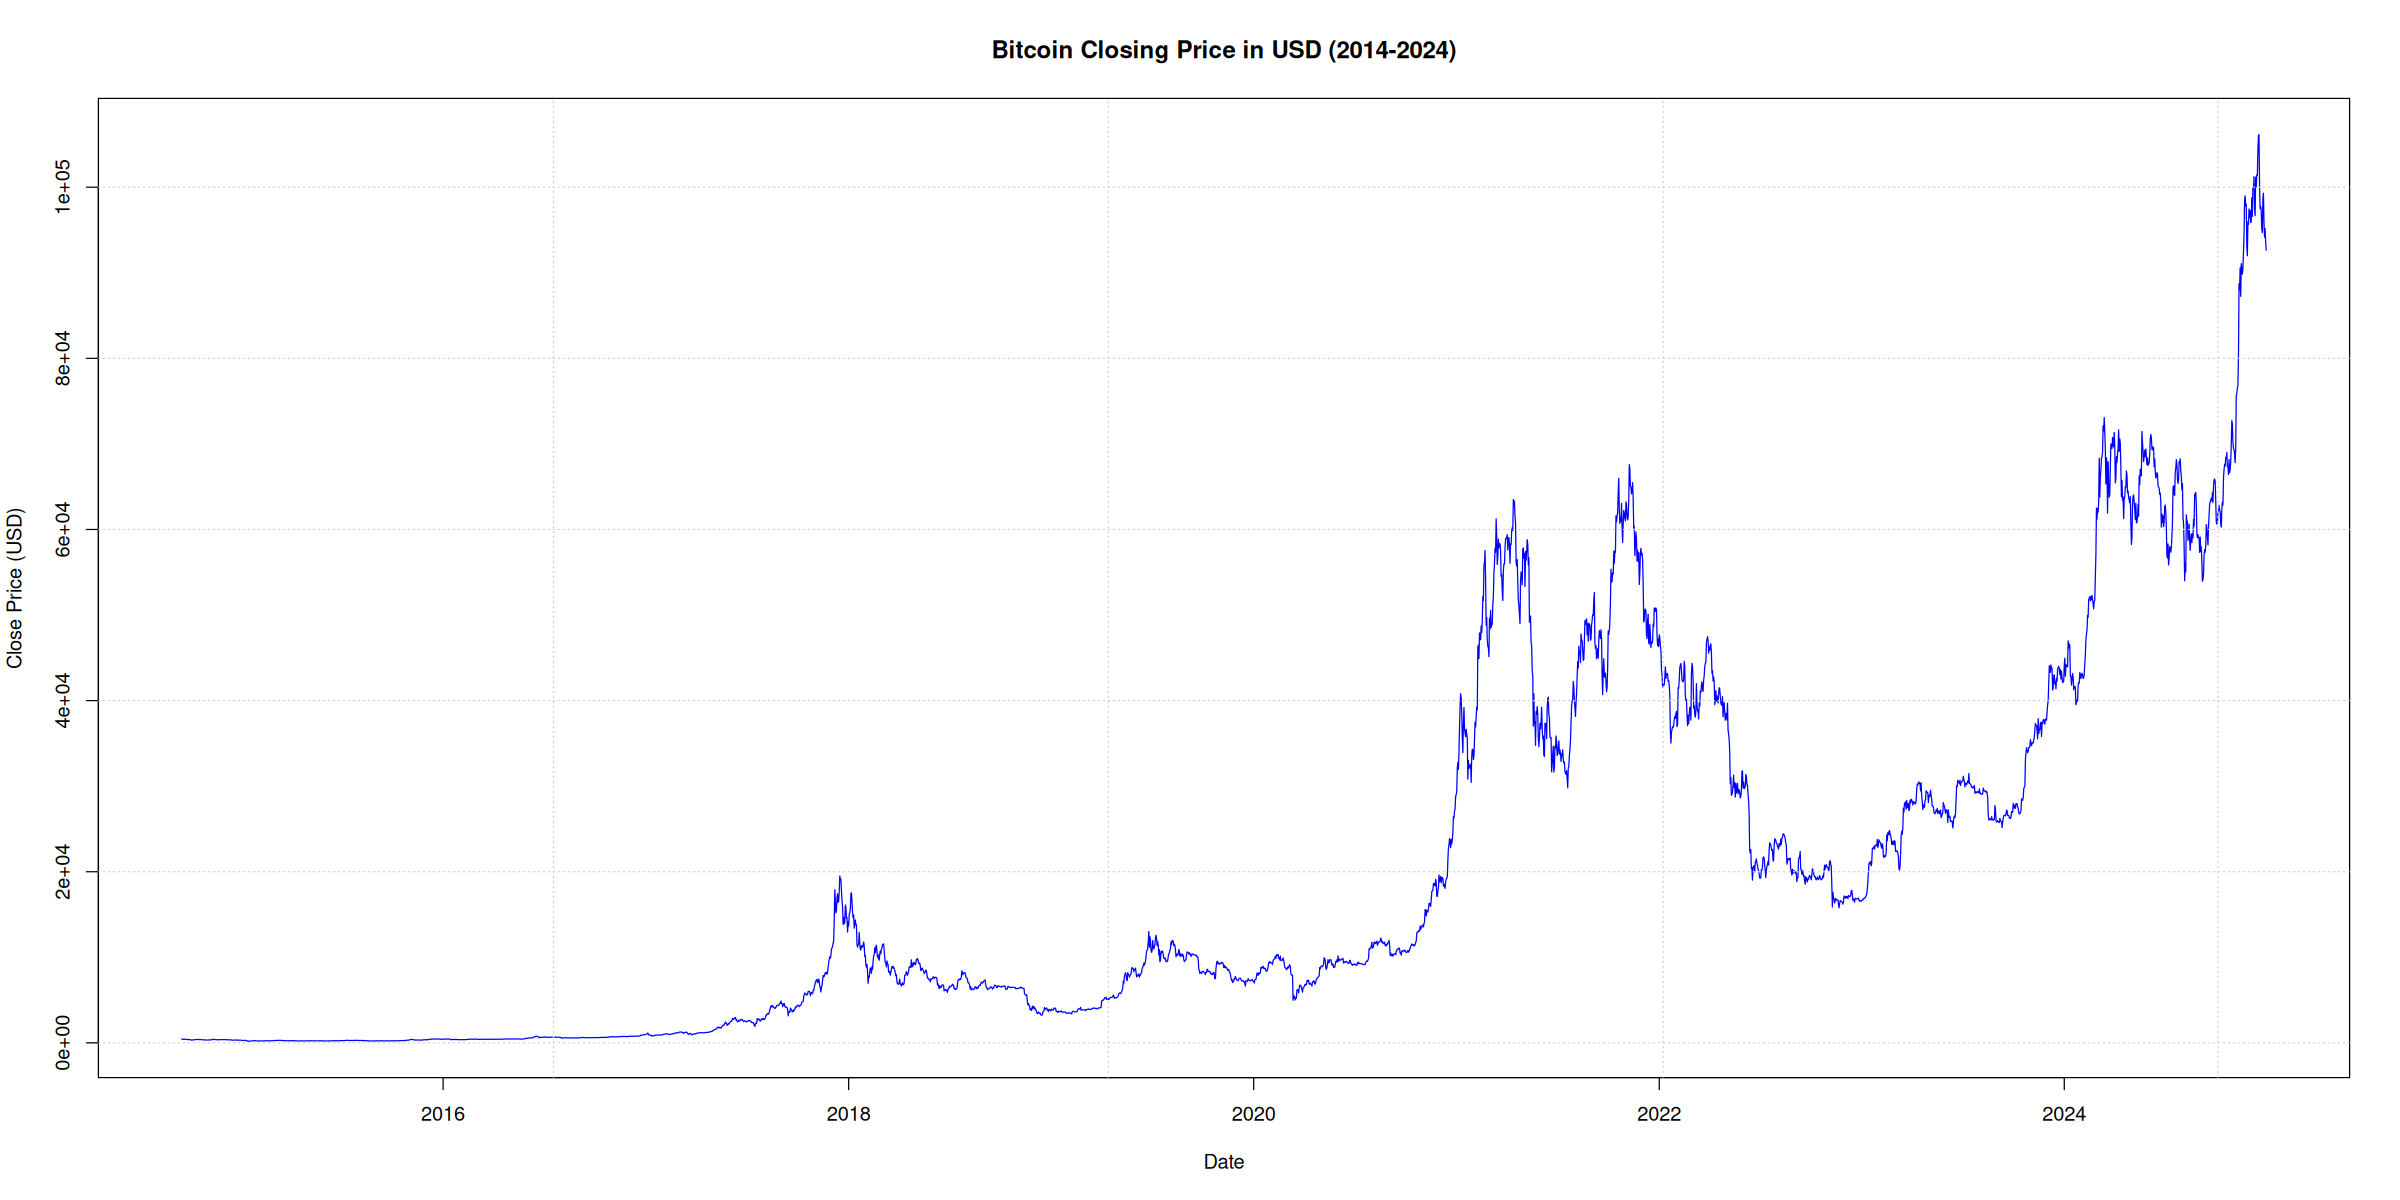

In [17]:
# Load the Bitcoin data
bitcoin_data <- read.csv("../data/bitcoin_data.csv")

# Convert the Date column to Date format
bitcoin_data$Date <- as.Date(bitcoin_data$Date)

# Display the first few rows
cat("First 5 rows of data:\n")
print(head(bitcoin_data, 5))

# Display basic information about the dataset
cat("\nDataset info:\n")
str(bitcoin_data)

# Display summary statistics
cat("\nSummary statistics:\n")
print(summary(bitcoin_data))


# Plot the Bitcoin closing price
par(bg = "white")
plot(bitcoin_data$Date, bitcoin_data$Close, 
     type = "l",
     main = "Bitcoin Closing Price in USD (2014-2024)",
     xlab = "Date",
     ylab = "Close Price (USD)",
     col = "blue",
     lwd = 1)
grid()

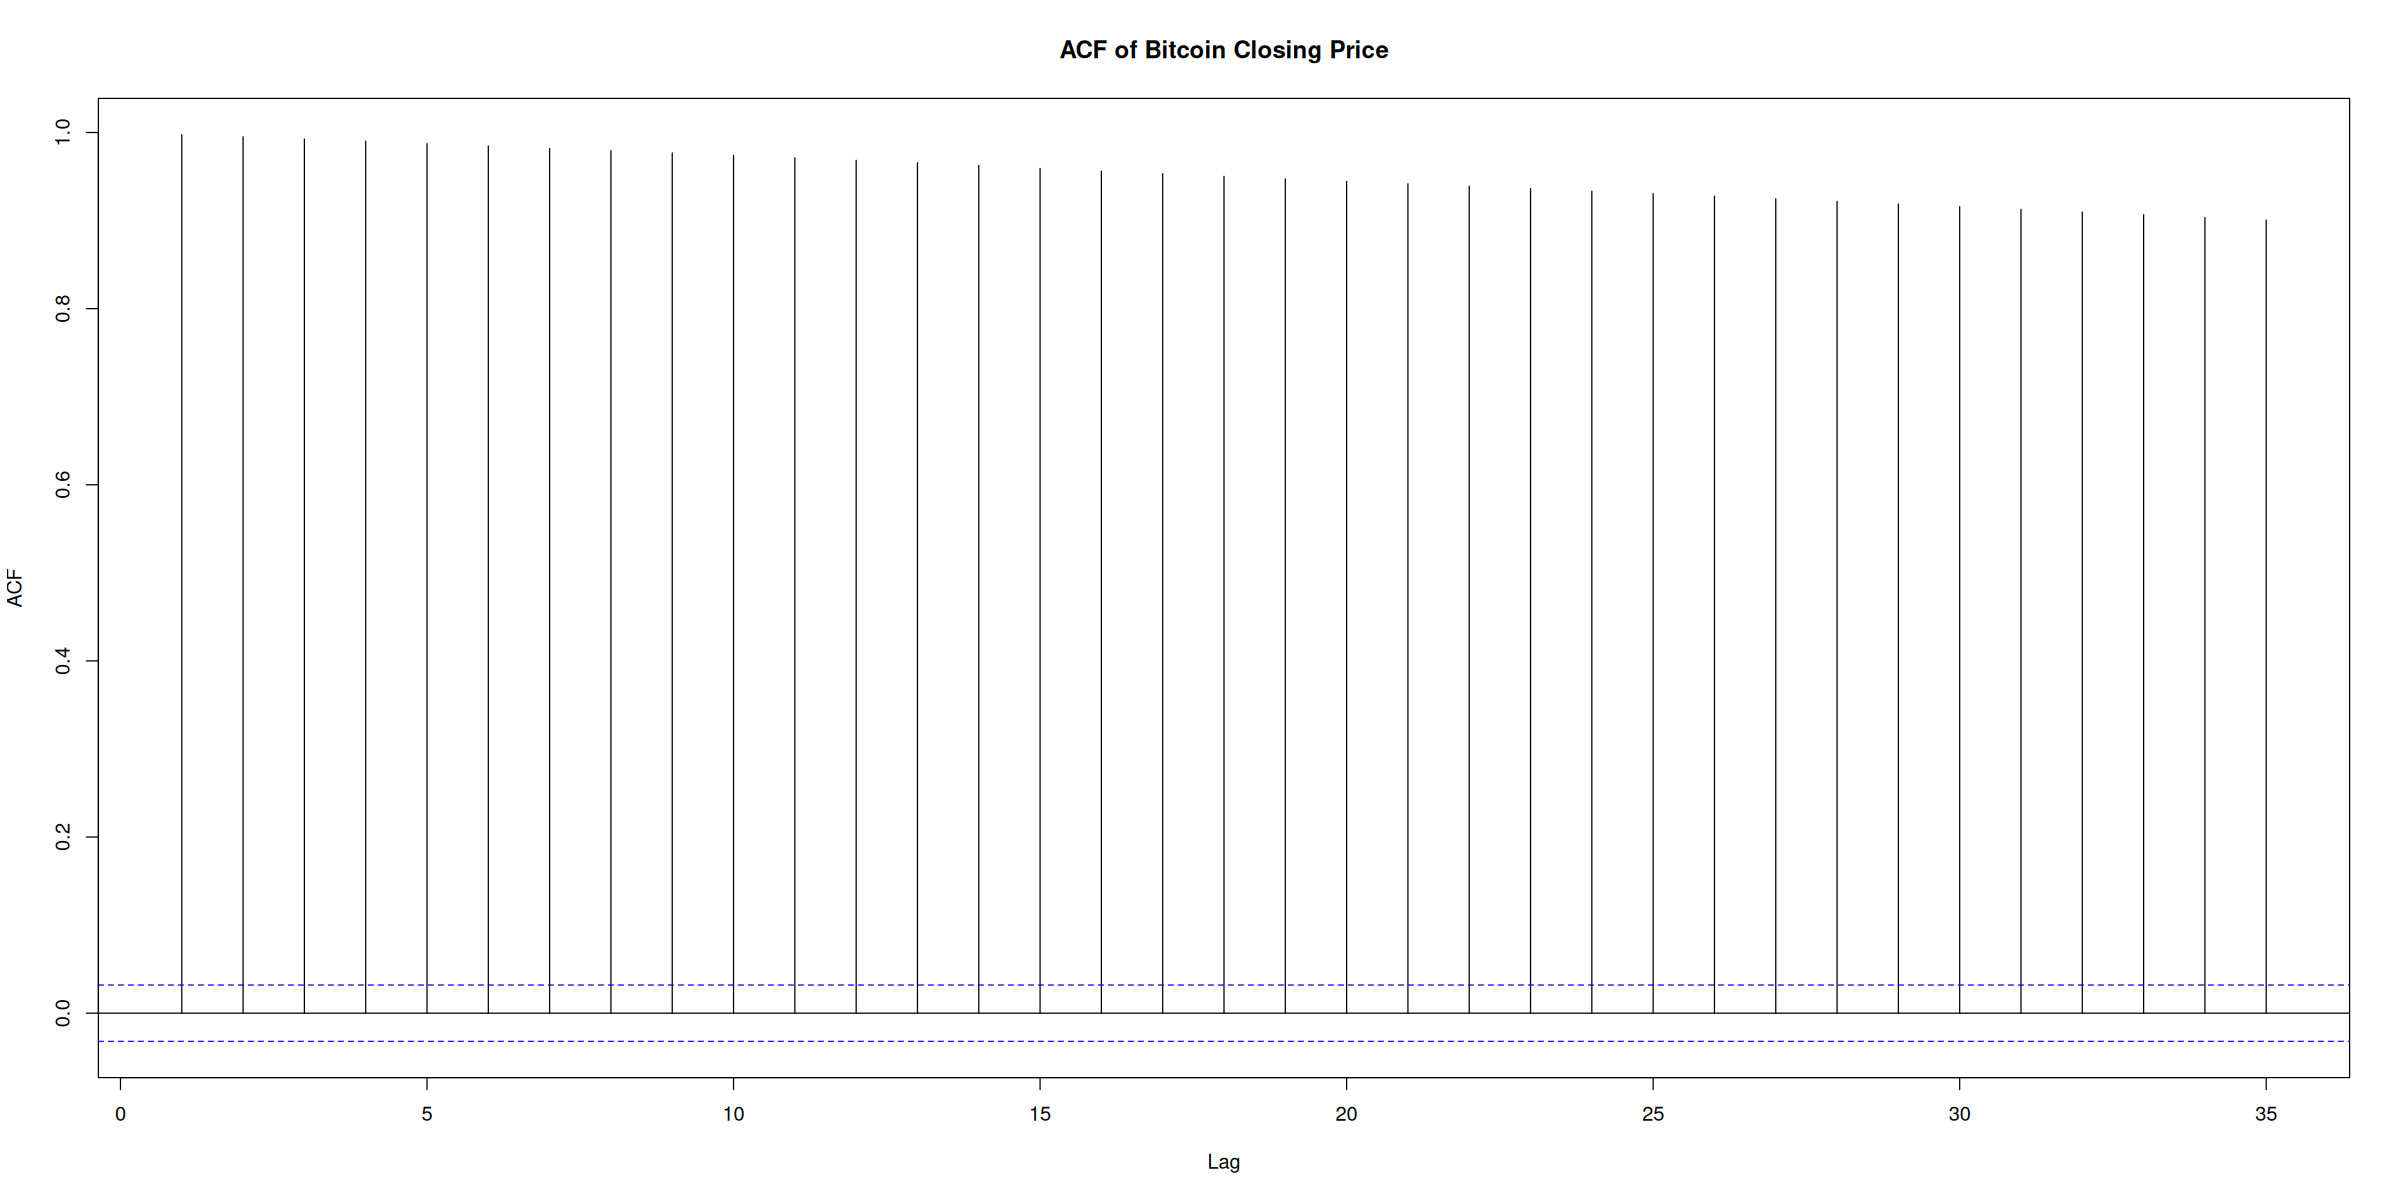

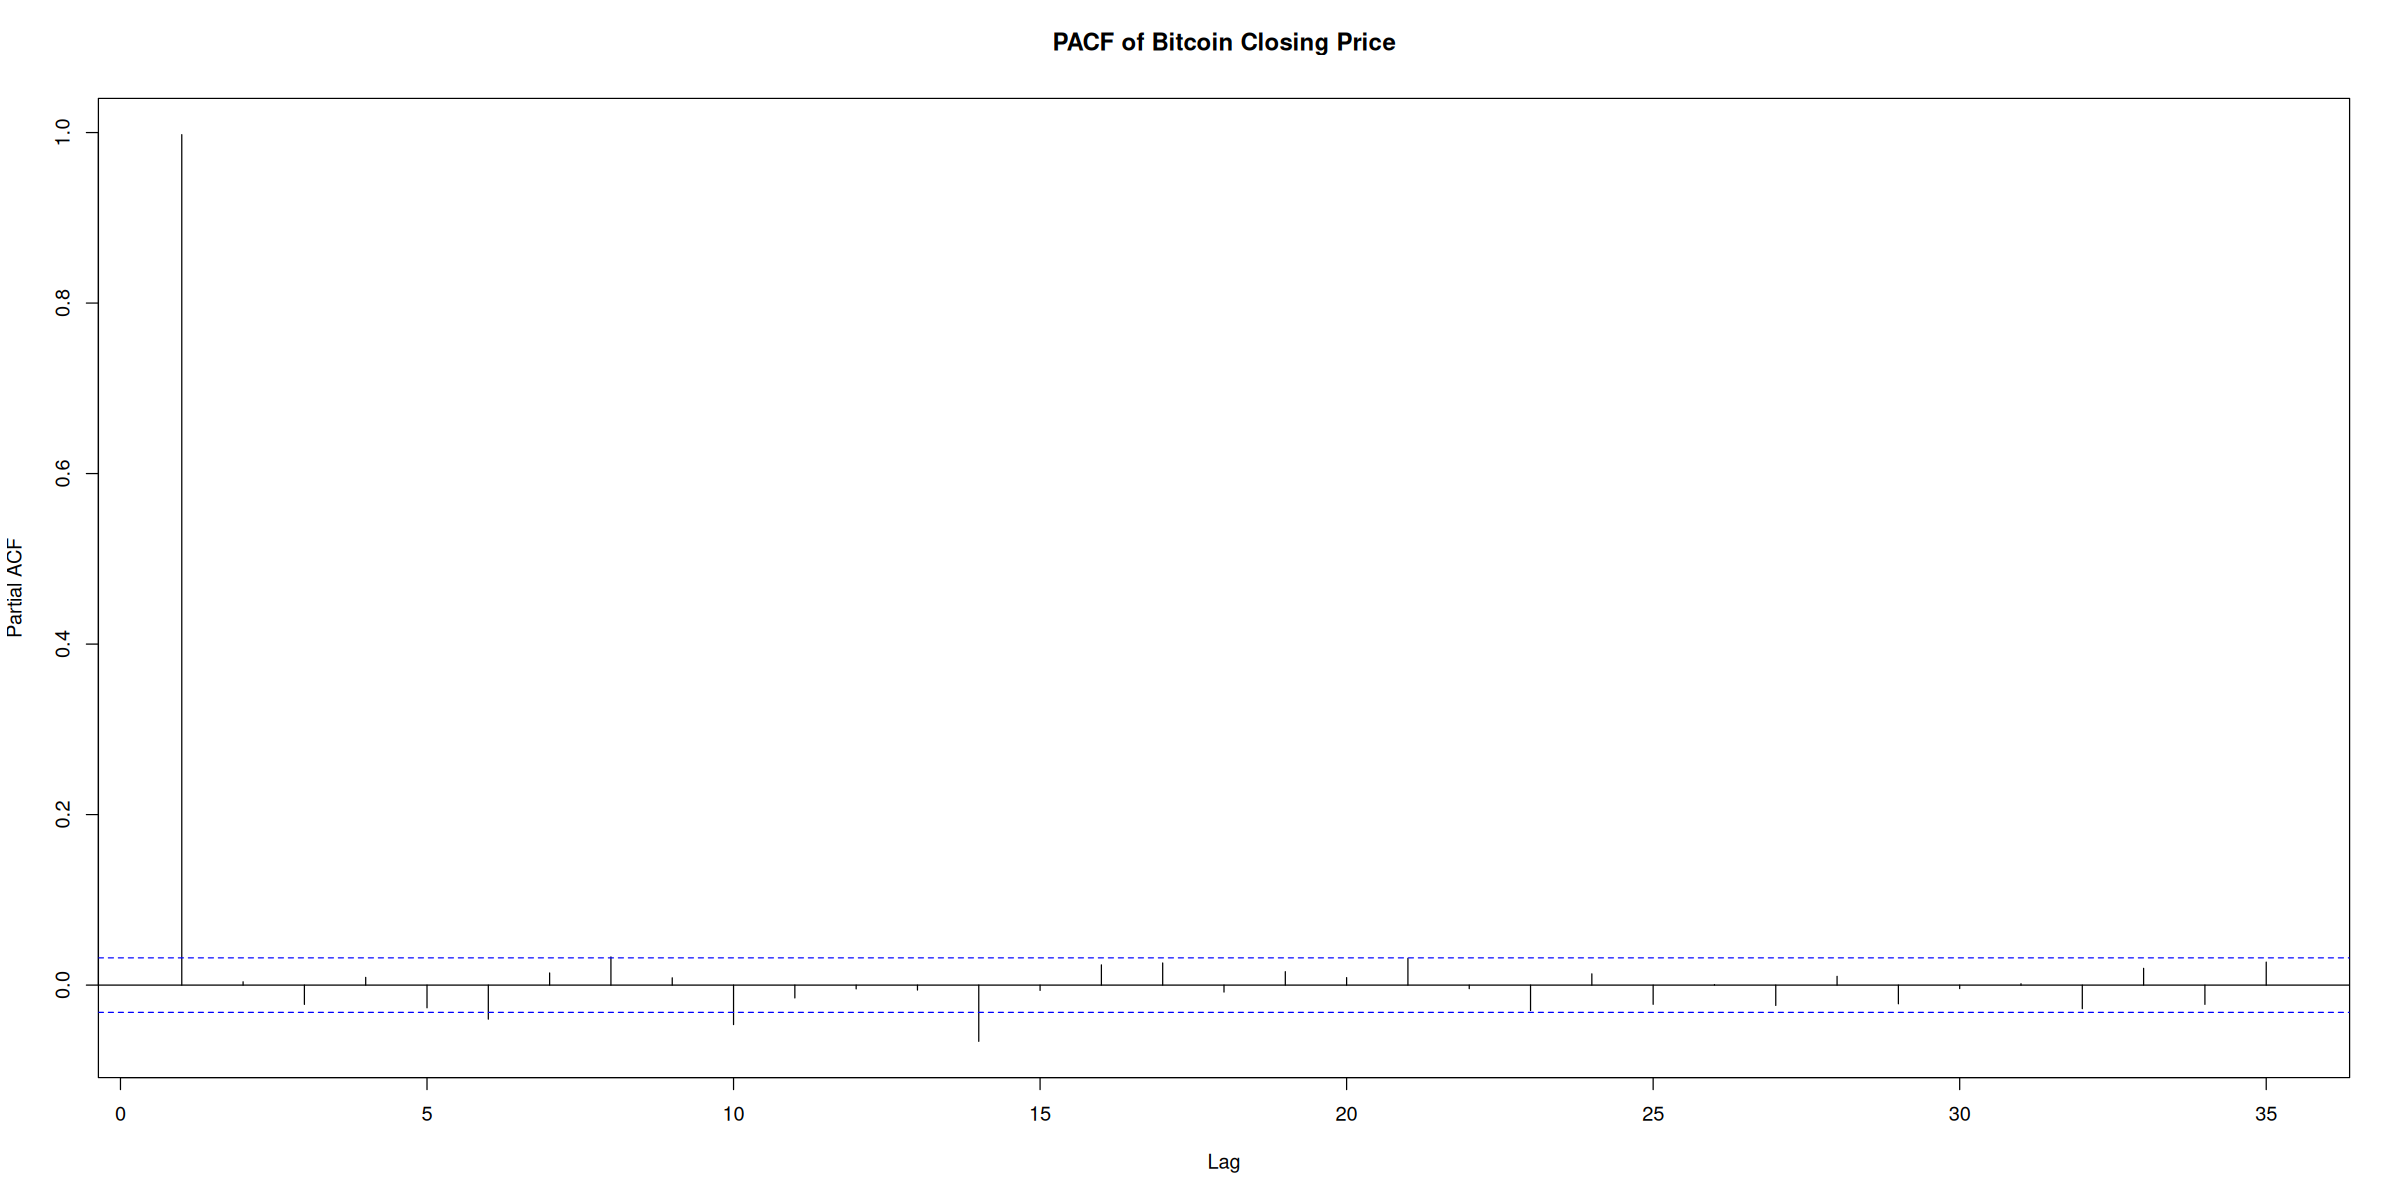

In [18]:
# ACF plot
par(bg = "white")
acf(bitcoin_data$Close, main = "ACF of Bitcoin Closing Price")
pacf(bitcoin_data$Close, main = "PACF of Bitcoin Closing Price")

In [19]:
# Augmented Dickey-Fuller test
library(tseries)
adf.test(bitcoin_data$Close)


	Augmented Dickey-Fuller Test

data:  bitcoin_data$Close
Dickey-Fuller = -1.4842, Lag order = 15, p-value = 0.7967
alternative hypothesis: stationary



Optimal lambda for Box-Cox transformation: 0.04334072 


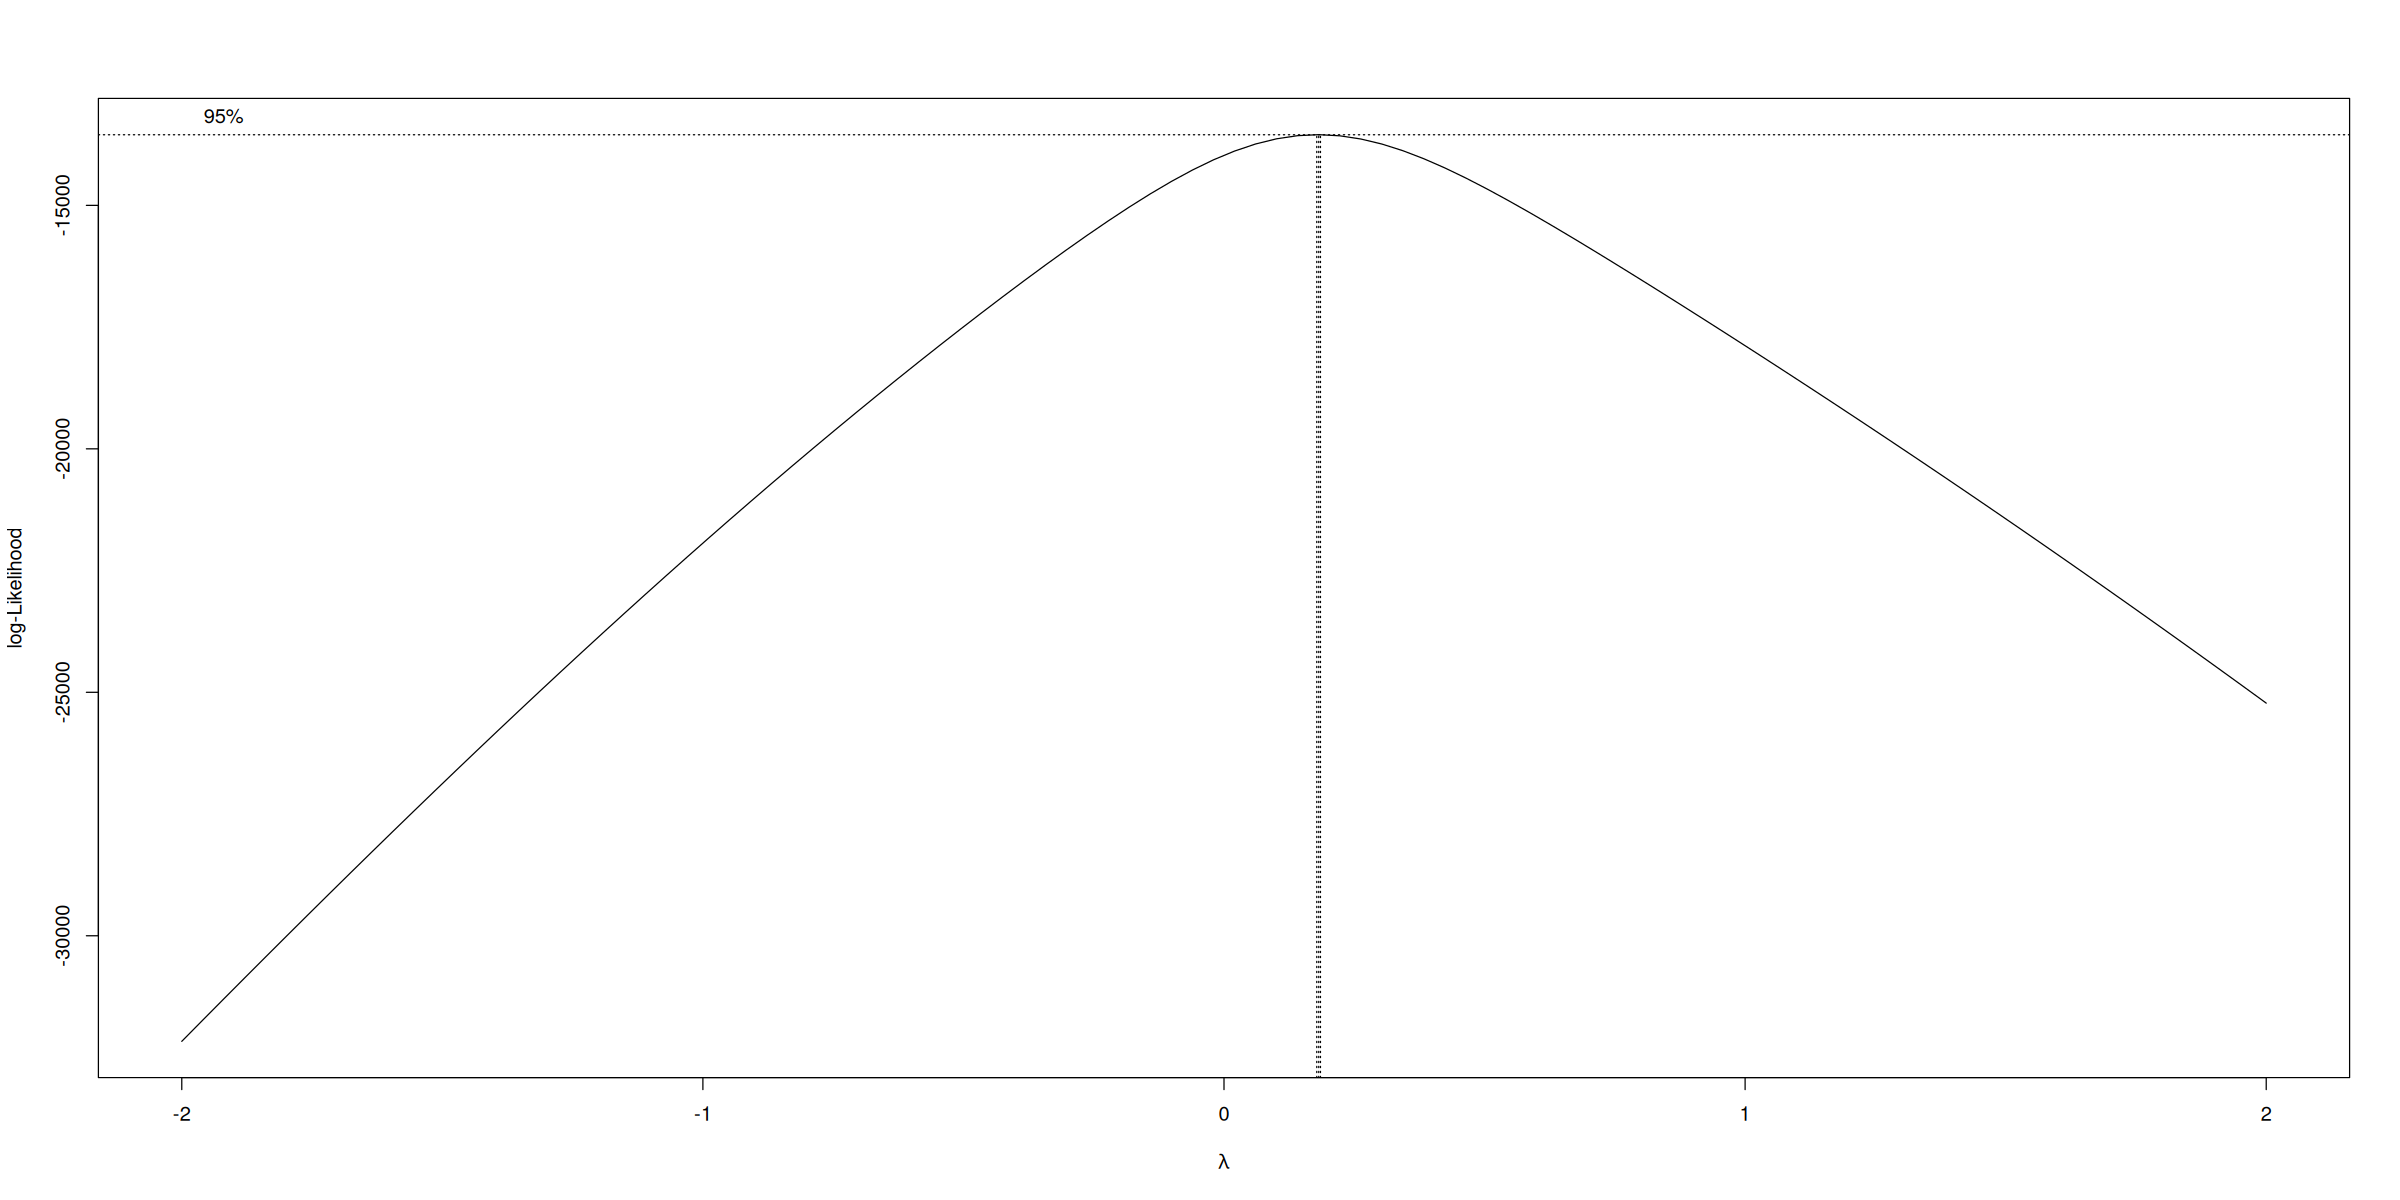

In [20]:
# Box Cox transformation
lambda <- BoxCox.lambda(bitcoin_data$Close)
cat("\nOptimal lambda for Box-Cox transformation:", lambda, "\n")
# Draw the Box-Cox transformation plot
par(bg = "white")
boxcox(bitcoin_data$Close ~ bitcoin_data$Date,
       lambda = seq(-2, 2, by = 0.1), plotit = TRUE)

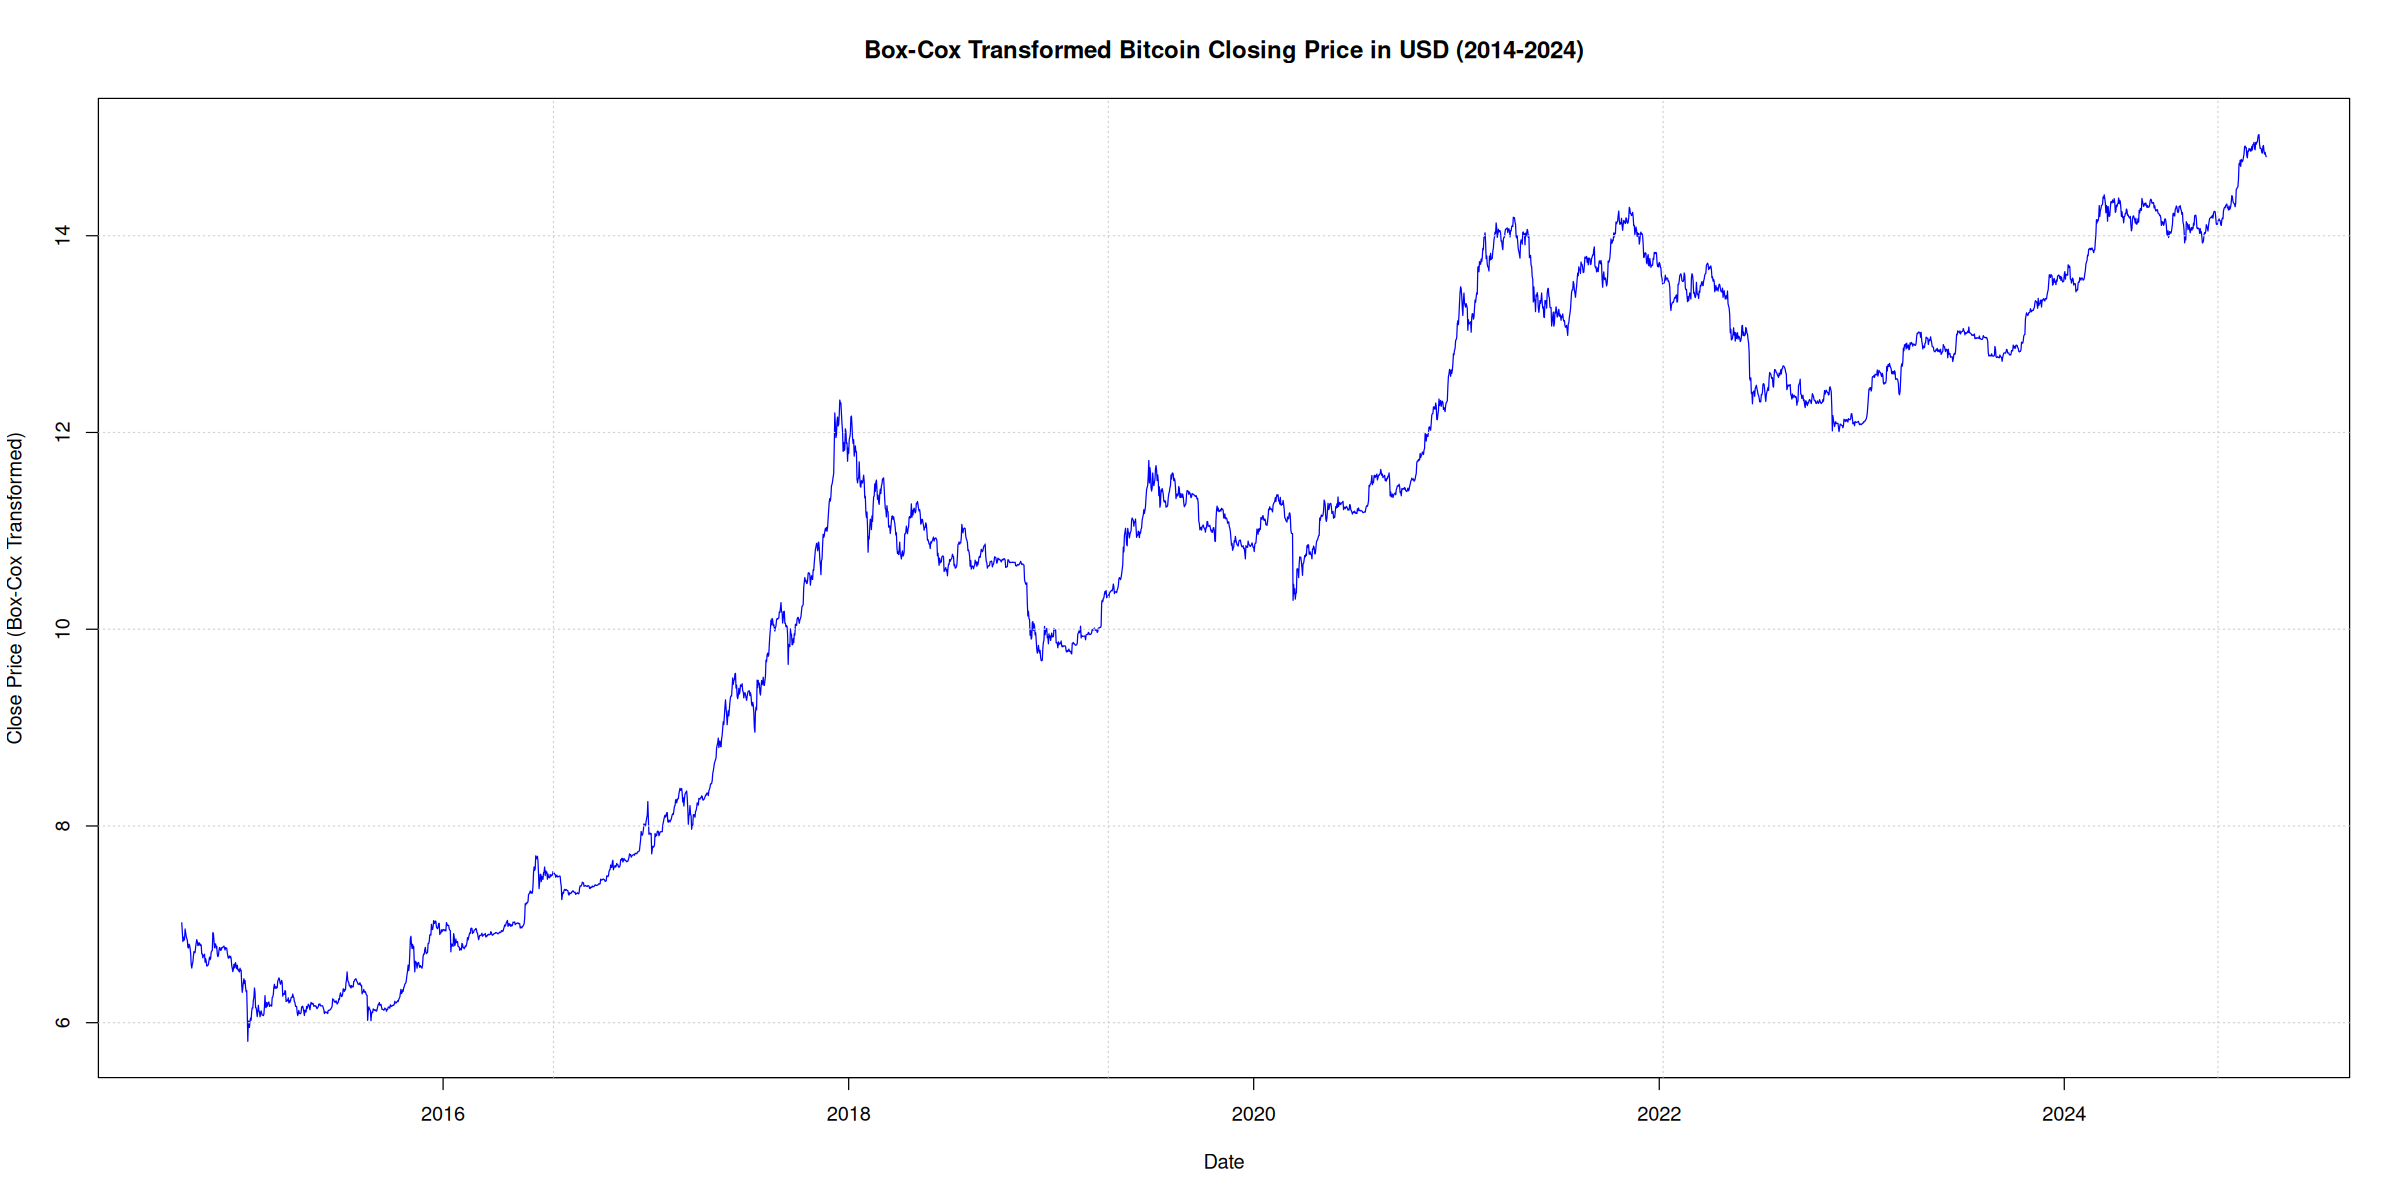

In [21]:
# Apply the Box-Cox transformationq
Close_boxcox <- BoxCox(bitcoin_data$Close, lambda)

# Plot the Box-Cox transformed series
par(bg = "white")
plot(bitcoin_data$Date, Close_boxcox,
     type = "l",
     main = "Box-Cox Transformed Bitcoin Closing Price in USD (2014-2024)",
     xlab = "Date",
     ylab = "Close Price (Box-Cox Transformed)",
     col = "blue",
     lwd = 1)
grid()

In [22]:
# ADF test on transformed data
library(tseries)
adf.test(Close_boxcox)


	Augmented Dickey-Fuller Test

data:  Close_boxcox
Dickey-Fuller = -1.8949, Lag order = 15, p-value = 0.6229
alternative hypothesis: stationary


In [23]:
# Calculate the first difference of the Box-Cox transformed closing price
close_diff <- c(NA, diff(Close_boxcox, differences = 1))

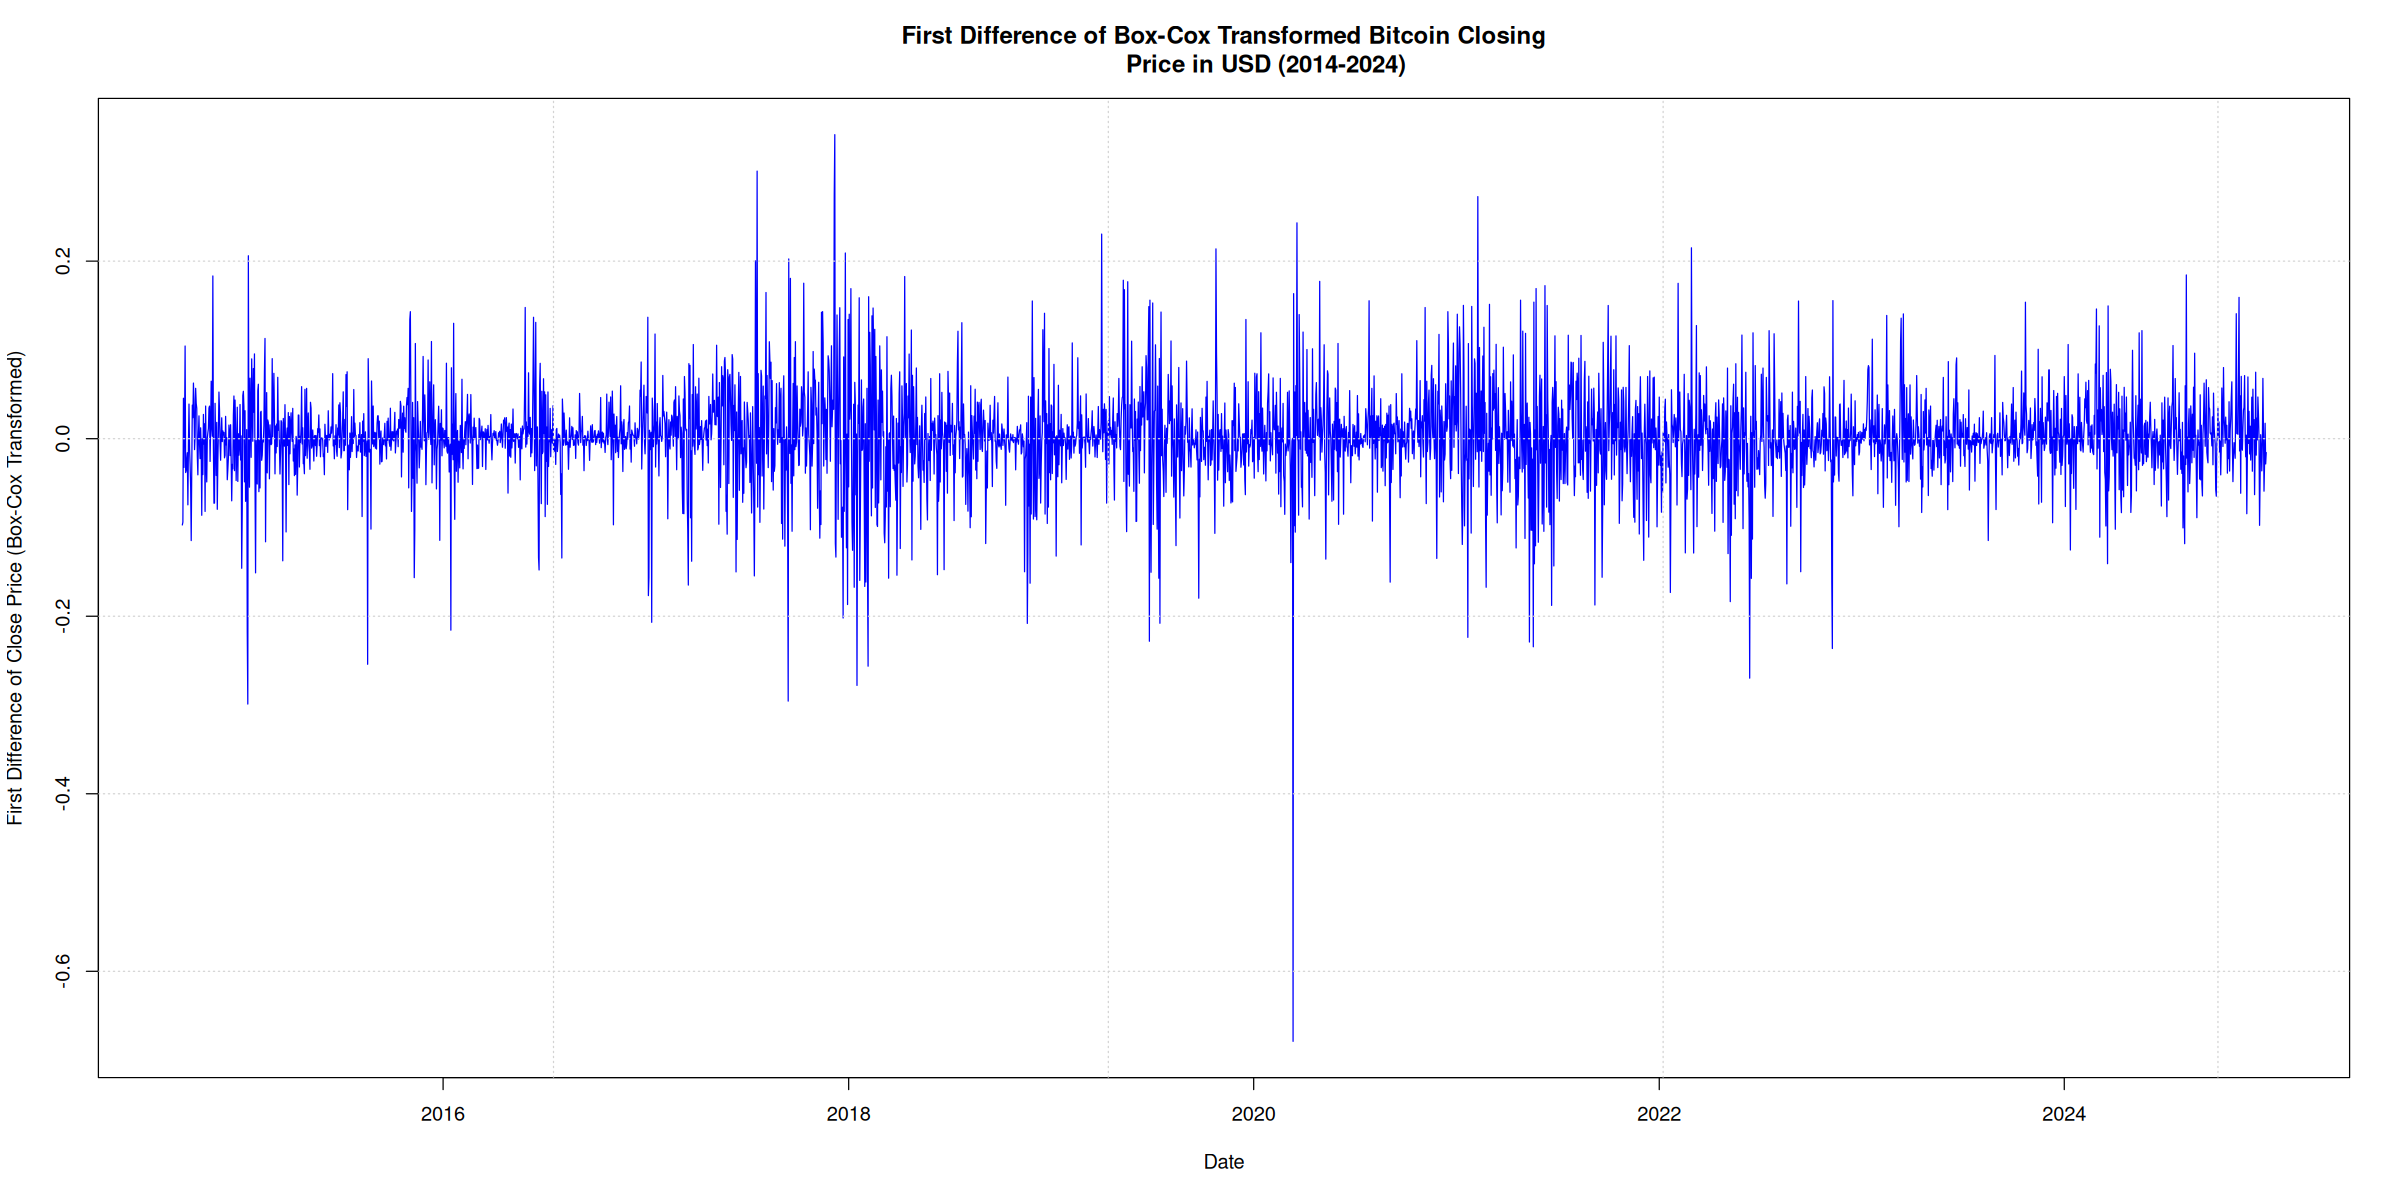

In [24]:
# Plot the first differenced series
par(bg = "white")
plot(bitcoin_data$Date, close_diff,
     type = "l",
     main = "First Difference of Box-Cox Transformed Bitcoin Closing
            Price in USD (2014-2024)",
     xlab = "Date",
     ylab = "First Difference of Close Price (Box-Cox Transformed)",
     col = "blue",
     lwd = 1)
grid()

In [ ]:
close_diff_tf <- ts(close_diff)

In [31]:
sum(is.na(close_diff_tf))  # Count the number of missing values

[1] 1

In [32]:
close_diff_tf <- na.omit(close_diff_tf)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“3  linear dependencies found”


Reordering variables and trying again:


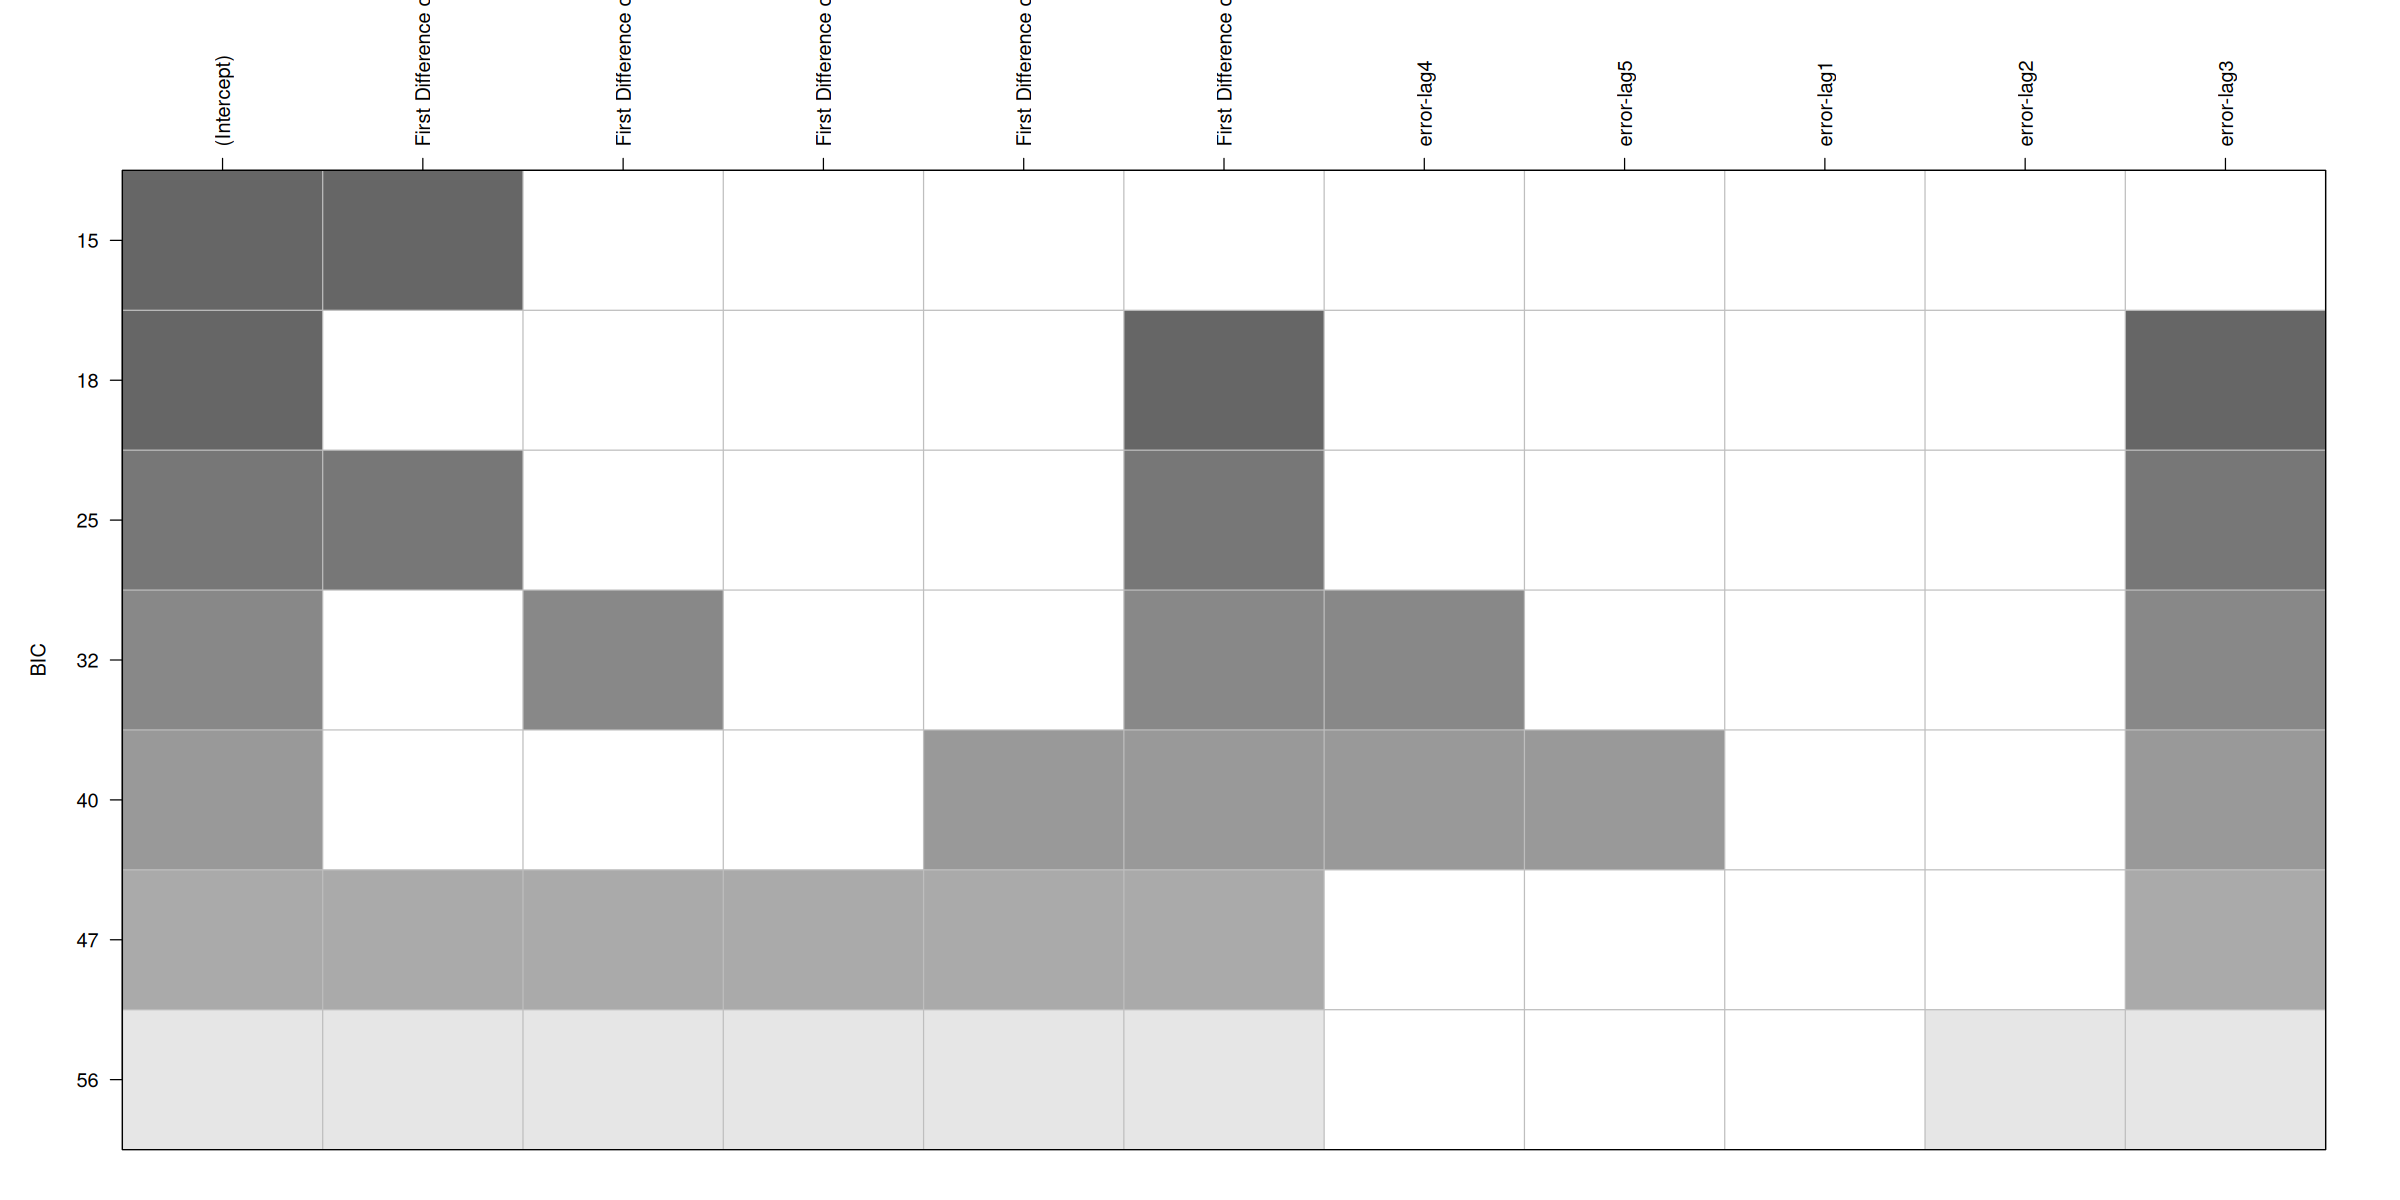

In [33]:
# Fit the best ARMA model using BIC
fit_arma <- armasubsets(y = close_diff_tf, nar = 5, nma = 5,
                        y.name = "First Difference of  Box-Cox Transformed 
                        Bitcoin Closing Price in USD (2014-2024)")

# Plot the BIC values for different ARMA models
par(bg = "white")
plot(fit_arma)